In [ ]:
import os
import math
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#Import Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,5)
sns.set(context="paper", font="monospace")

import warnings
warnings.filterwarnings('ignore')


In [ ]:

df = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-m-points.csv', encoding = "ISO-8859-1")

In [ ]:


df1 = df[df['match_id'].str.contains("Roger_Federer")]
df2 = df[df['match_id'].str.contains("Novak_Djokovic")]
df3 = df[df['match_id'].str.contains("Rafael_Nadal")]
df4 = df[df['match_id'].str.contains("Andy_Murray")]
df5 = df[df['match_id'].str.contains("Alexander_Bublik")]
df6 = df[df['match_id'].str.contains("Andrey_Rublev")]
df7 = df[df['match_id'].str.contains("Stanislas_Wawrinka")]
df8 = df[df['match_id'].str.contains("David_Ferrer")]
df9 = df[df['match_id'].str.contains("Tomas_Berdych")]
df10 = df[df['match_id'].str.contains("Kei_Nishikori")]


df_new1 = df1['match_id'].str.split("-")
df_new2 = df2['match_id'].str.split("-")
df_new3 = df3['match_id'].str.split("-")
df_new4 = df4['match_id'].str.split("-")
df_new5 = df5['match_id'].str.split("-")
df_new6 = df6['match_id'].str.split("-")
df_new7 = df7['match_id'].str.split("-")
df_new8 = df8['match_id'].str.split("-")
df_new9 = df9['match_id'].str.split("-")
df_new10 = df10['match_id'].str.split("-")

In [ ]:
serve_direction = {'4':'out wide', 
                   '5':'body',
                   '6':'down the T', 
                   '0':'unknown'
                  }
serve_faults = {'n':'net (anything that goes into the net, including net cords that are not lets)',
                'w':'wide (in either direction)',
                'd':'deep',
                'x':'both wide and deep',
                'g':'foot faults',
                'e':'unknown',
                '!':'shank',
                'V':'time violation',
                'c':'let',
                '+':'serve and volley',
                '*':'Ace',
                '#':'forced error',
                '@':'unforced error'
              }
shot_type = {
    'f':'forehand groundstroke (excluding slices, chips, etc.)',
    'b':'backhand groundstroke (excluding slices, chips, etc.)',
    'r':'forehand slice (including defensive chips, but not drop shots)',
    's':'backhand slice (including defensive chips, but not drop shots)',
    'v':'forehand volley',
    'z':'backhand volley',
    'o':'standard overhead/smash',
    'p':'"backhand" overhead/smash',
    'u':'forehand drop shot',
    'y':'backhand drop shot',
    'l':'forehand lob',
    'm':'backhand lob',
    'h':'forehand half-volley',
    'i':'backhand half-volley',
    'j':'forehand swinging volley',
    'k':'backhand swinging volley',
    't':'all trick shots, including behind-the-back, between-the-legs, and "tweeners."',
    'q':'any unknown shot',
    '*':'winner'

}
shot_direction = {
    '1':'to a right-hander''s forehand side or left-hander''s backhand side',
    '2':'down the middle of the court',
    '3':'to a right-hander''s backhand side or left-hander''s forehand side',
    '0':'unknown'
}
shot_depth = {
    '7':'within the service boxes',
    '8':'behind the service line, but closer to the service line than the baseline',
    '9':'closer to the baseline than the service line'
}
court_position = {
    '^':'Stop volleys/drop volleys',
    ';':'hits the net cord',
    '-':'shot took place at the net',
    '=':'shot took place at the baseline',
    '+':'approach'
}

In [ ]:
rallyCount = df1['rallyCount']
first_serve = df1['1st']
second_serve = df1['2nd']
isforced = df1['isForced']
isace = df1['isAce']
isunforced = df1['isUnforced']
isdouble = df1['isDouble']
serve_faults_list = []
serve_direction_list = []
shot_depth_list = []
shot_type_list = []
shot_direction_list = []
court_position_list = []
#print(rallyCount[:10], first_serve[:10], second_serve[:10], isace[:10], isforced[:10], isunforced[:10], isdouble[:10])
for serve1, serve2, rally in zip(first_serve[:10], second_serve[:10], rallyCount[:10]):
  serve = serve1
  if len(serve1) < int(rally):
    serve = serve2
  #rally_seq = []
  res = []
  for s in serve:
    if serve_faults.get(s, None):
      res.append(serve_faults.get(s, None))
    if serve_direction.get(s, None):
      res.append(serve_direction.get(s, None))
    if shot_depth.get(s, None):
      res.append(shot_depth.get(s, None))
    if shot_direction.get(s, None):
      res.append(shot_direction.get(s, None))
    if (shot_type.get(s, None)):
      res.append(shot_type.get(s, None))
    if court_position.get(s, None):
      res.append(court_position.get(s, None))
    #rally_seq.append(res(0))

  for s in serve:
    if serve_faults.get(s, None):
      serve_faults_list.append(serve_faults.get(s, None))
    if serve_direction.get(s, None):
      serve_direction_list.append(serve_direction.get(s, None))
    if shot_depth.get(s, None):
      shot_depth_list.append(shot_depth.get(s, None))
    if shot_direction.get(s, None):
      shot_direction_list.append(shot_direction.get(s, None))
    if (shot_type.get(s, None)):
      shot_type_list.append(shot_type.get(s, None))
    if court_position.get(s, None):
      court_position_list.append(court_position.get(s, None))
  output = ' '.join(res)
  print(serve, output)

print(serve_faults_list)
print(serve_direction_list)
print(shot_depth_list)
print(shot_type_list)
print(shot_direction_list)
print(court_position_list)
    #print(res)
    #print(s, serve_faults.get(s, None), serve_direction.get(s, None), shot_depth.get(s, None), shot_direction.get(s, None), shot_type.get(s, None), court_position.get(s, None))
    #break

5s28f1f2f2b1n@ body backhand slice (including defensive chips, but not drop shots) down the middle of the court behind the service line, but closer to the service line than the baseline forehand groundstroke (excluding slices, chips, etc.) to a right-handers forehand side or left-handers backhand side forehand groundstroke (excluding slices, chips, etc.) down the middle of the court forehand groundstroke (excluding slices, chips, etc.) down the middle of the court backhand groundstroke (excluding slices, chips, etc.) to a right-handers forehand side or left-handers backhand side net (anything that goes into the net, including net cords that are not lets) unforced error
4s3w# out wide backhand slice (including defensive chips, but not drop shots) to a right-handers backhand side or left-handers forehand side wide (in either direction) forced error
5s38s2f+1f3w# body backhand slice (including defensive chips, but not drop shots) to a right-handers backhand side or left-handers forehand s

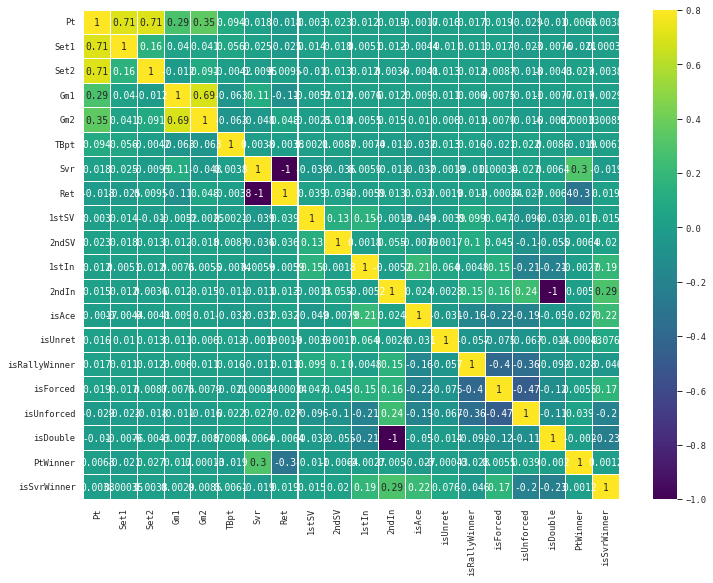

In [ ]:
cormat = df1.corr()

f, ax = plt.subplots(figsize=(12, 9))

colormap = plt.cm.viridis
sns.heatmap(cormat, linewidths=0.1, cmap = colormap, 
            linecolor = 'White', vmax=0.8, annot=True)

In [ ]:
ad = df[df['Notes'].str.contains("deuce") == True]
print(ad.iloc[0])

In [ ]:
fault = df[df['1st'].str.contains("n") == True]
print(fault.iloc[0])

In [ ]:
df00 = df[df['match_id'].str.contains("Roger_Federer-Rafael_Nadal")]

In [ ]:

for i in range(100):
  if df00.iloc[i]['match_id'] == "20190712-M-Wimbledon-SF-Roger_Federer-Rafael_Nadal":
      print(df00.iloc[i]['Pt'], " ", df00.iloc[i]['Pts'], " ", df00.iloc[i]['isRallyWinner'], " ", df00.iloc[i]['rallyCount'], " ", df00.iloc[i]['Notes'])


In [ ]:
df_rf = df[df['match_id'].str.contains("Roger_Federer")]
df_rf1 = df['match_id'].str.split("-")

In [ ]:
firstPlayer = []
for i, player in enumerate(df_rf1):
    firstPlayer.append(player[4])

df_rf["First_Player"] = pd.Series(firstPlayer) 

In [ ]:
secondPlayer = []
for i, player in enumerate(df_rf1):
    secondPlayer.append(player[5])

df_rf['Second_Player'] = pd.Series(secondPlayer)   

In [ ]:
matchIdList = []
for i, Id in enumerate(df_rf1):
    matchIdList.append(Id[0])

df_rf['MatchId'] = pd.Series(matchIdList)

In [ ]:
rallyCount = list(df_rf['rallyCount'])

previousRalleyCount = []
matchId = 0 
for i, Id in enumerate(matchIdList):
    j = i - 1
    if j < len(rallyCount):
      if Id == matchId:
          previousRalleyCount.append(int(rallyCount[j]))
      else:
          previousRalleyCount.append(0)
    else:
      break
    matchId = Id
    
df_rf['Previous_Rally_Count'] = pd.Series(previousRalleyCount)
print(previousRalleyCount)

[0, 5, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 3, 1, 1, 4, 2, 1, 1, 1, 3, 3, 1, 2, 10, 2, 4, 1, 6, 1, 1, 4, 14, 3, 1, 3, 1, 1, 3, 3, 2, 4, 4, 3, 2, 3, 3, 1, 2, 0, 1, 1, 1, 1, 1, 2, 8, 4, 2, 1, 3, 3, 0, 4, 4, 1, 2, 2, 1, 3, 4, 3, 4, 6, 3, 2, 7, 12, 0, 2, 2, 5, 4, 3, 1, 5, 3, 5, 1, 2, 3, 8, 3, 3, 1, 2, 3, 2, 3, 4, 3, 3, 4, 3, 7, 1, 13, 3, 2, 3, 2, 2, 1, 3, 16, 1, 4, 4, 6, 1, 2, 9, 1, 3, 2, 3, 1, 5, 1, 0, 1, 1, 5, 3, 5, 2, 4, 5, 3, 3, 7, 1, 1, 4, 1, 3, 2, 2, 2, 7, 7, 3, 1, 2, 2, 10, 5, 9, 4, 9, 1, 6, 5, 1, 1, 1, 1, 3, 1, 2, 4, 1, 1, 1, 1, 2, 5, 1, 6, 5, 3, 3, 2, 9, 1, 1, 0, 0, 1, 0, 1, 7, 5, 1, 1, 4, 1, 1, 14, 1, 1, 9, 1, 5, 4, 1, 5, 3, 5, 5, 8, 3, 5, 7, 1, 3, 1, 2, 0, 4, 4, 5, 1, 3, 1, 3, 2, 1, 2, 1, 3, 7, 1, 6, 1, 1, 0, 3, 6, 3, 1, 9, 4, 4, 16, 1, 3, 3, 1, 5, 1, 2, 6, 4, 2, 2, 8, 1, 1, 1, 2, 1, 5, 5, 1, 6, 2, 3, 0, 1, 3, 3, 1, 3, 3, 3, 1, 1, 2, 1, 7, 4, 3, 1, 6, 1, 6, 4, 1, 3, 6, 3, 1, 1, 7, 5, 1, 1, 3, 2, 1, 3, 3, 6, 1, 1, 6, 9, 1, 4, 4, 3, 3, 5, 7, 6, 7, 3, 3, 3, 9, 4, 12, 3, 3, 1, 1, 1, 

In [ ]:

df_rf = df_rf[df_rf['Serving'].str.contains("RF")]

deuceScores = ['0-0', '15-15', '30-0', '0-30', '40-15', '15-40', '40-40']
pts = list(df_rf["Pts"])
isDueceCourt = []
for pt in pts:    
    if pt in deuceScores:
        isDueceCourt.append(1)
    else:
        isDueceCourt.append(0)

df_rf["Is_Duece_Court"] = isDueceCourt

In [ ]:
print(df_rf.keys())

Index(['match_id', 'Pt', 'Set1', 'Set2', 'Gm1', 'Gm2', 'Pts', 'Gm#', 'TbSet',
       'TB?', 'TBpt', 'Svr', 'Ret', 'Serving', '1st', '2nd', 'Notes', '1stSV',
       '2ndSV', '1stIn', '2ndIn', 'isAce', 'isUnret', 'isRallyWinner',
       'isForced', 'isUnforced', 'isDouble', 'PtWinner', 'isSvrWinner',
       'rallyCount', 'Set_RF', 'Set_Opp', 'First_Player', 'Second_Player',
       'MatchId', 'Previous_Rally_Count', 'Is_Duece_Court'],
      dtype='object')


In [ ]:
ptWinner = list(df_rf["PtWinner"])
firstPlayer = list(df_rf["First_Player"])
matchIdList = list(df_rf["MatchId"])

winnerList = []
for i, player in enumerate(firstPlayer):
    if firstPlayer == "Roger_Federer" and ptWinner[i] == 1:
        winnerList.append("RF")
    elif firstPlayer != "Roger_Federer" and ptWinner[i] == 2:
        winnerList.append("RF")
    else:
        winnerList.append("OPP")

winnerList2 = []
matchId = 0 
for i, Id in enumerate(matchIdList):
    j = i - 1
    if Id == matchId:
        winnerList2.append(winnerList[j])
    else:
        winnerList2.append("O")
    matchId = Id
print(winnerList2)

['O', 'RF', 'RF', 'OPP', 'RF', 'RF', 'RF', 'OPP', 'OPP', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'OPP', 'OPP', 'RF', 'OPP', 'OPP', 'OPP', 'OPP', 'OPP', 'OPP', 'RF', 'OPP', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'OPP', 'RF', 'OPP', 'RF', 'RF', 'RF', 'RF', 'OPP', 'RF', 'OPP', 'RF', 'OPP', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'OPP', 'RF', 'RF', 'RF', 'OPP', 'OPP', 'RF', 'RF', 'RF', 'RF', 'RF', 'OPP', 'RF', 'O', 'RF', 'RF', 'OPP', 'RF', 'RF', 'RF', 'OPP', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'OPP', 'RF', 'RF', 'RF', 'OPP', 'OPP', 'OPP', 'RF', 'RF', 'RF', 'RF', 'OPP', 'OPP', 'RF', 'RF', 'RF', 'OPP', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'OPP', 'RF', 'RF', 'OPP', 'RF', 'RF', 'RF', 'RF', 'RF', 'OPP', 'RF', 'RF', 'OPP', 'RF', 'RF', 'OPP', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'RF', 'OPP', 'OPP', 'RF', 'RF', 'RF', 'OPP', 'RF', 'RF', 'OPP', 'OPP', '

In [ ]:

df_rf['Gm2'] = df_rf['Gm2'].apply(np.int64)
df_rf["Winner"] = winnerList2
df_rf['1st'] = df_rf['1st'].str[0]
df_rf['2nd'] = df_rf['2nd'].str[0]

gm_rf = []
gm_opp = []
for index, row in df_rf.iterrows():
    if row['First_Player'] == 'Roger_Federer':
        gm_rf.append(row['Gm1'])
        gm_opp.append(row['Gm2'])
    else:
        gm_rf.append(row['Gm2'])
        gm_opp.append(row['Gm1'])

df_rf['Gm_RF'] = gm_rf
df_rf['Gm_Opp'] = gm_opp

In [ ]:
set_rf = []
set_opp = []
for index, row in df_rf.iterrows():
    if row['First_Player'] == 'Roger_Federer':
        set_rf.append(row['Set1'])
        set_opp.append(row['Set2'])
    else:
        set_rf.append(row['Set2'])
        set_opp.append(row['Set1'])

df_rf['Set_RF'] = set_rf
df_rf['Set_Opp'] = set_opp

In [ ]:

df_pts = df_rf['Pts'].str.split("-")


pts_rf = []
for pt in df_pts:
    pt_rf = pt[0]
    
    if pt_rf == "AD":
        pts_rf.append("50")
    else:
        pts_rf.append(pt_rf)

df_rf['Pts_RF'] = pts_rf


pts_opp = []

for pt in df_pts:
    pt_opp = pt[1]
    
    if pt_opp == "AD":
        pts_opp.append("50")
    else:
        pts_opp.append(pt_opp)
        
df_rf['Pts_Opp'] = pts_opp

df_rf = df_rf[['Set_RF', 'Set_Opp', 'Gm_RF', 'Gm_Opp','Pts_RF', 'Pts_Opp', '1st', 'Previous_Rally_Count', 'Winner', 'Is_Duece_Court']]


df_rf = df_rf[df_rf['1st'].apply(lambda x: x.isnumeric())]
df_rf = df_rf[df_rf['Pts_Opp'].apply(lambda x: x.isnumeric())]
df_rf = df_rf.reset_index()
df_rf = df_rf.drop(['index'], axis = 1)

df_rf['Gm_RF'] = df_rf['Gm_RF'].apply(np.int64)
df_rf['Gm_Opp'] = df_rf['Gm_Opp'].apply(np.int64)
df_rf['Pts_RF'] = df_rf['Pts_RF'].apply(np.int64)
df_rf['Pts_Opp'] = df_rf['Pts_Opp'].apply(np.int64)
df_rf['Previous_Rally_Count'] = df_rf['Previous_Rally_Count']
df_rf['Winner'] = pd.factorize(df_rf['Winner'])[0] + 1
df_rf["Serve"] = df_rf["1st"].apply(np.int64)
df_rf = df_rf.drop('1st', axis = 1)




In [ ]:
print(df_rf.keys())

Index(['match_id', 'Pt', 'Set1', 'Set2', 'Gm1', 'Gm2', 'Pts', 'Gm#', 'TbSet',
       'TB?', 'TBpt', 'Svr', 'Ret', 'Serving', '1st', '2nd', 'Notes', '1stSV',
       '2ndSV', '1stIn', '2ndIn', 'isAce', 'isUnret', 'isRallyWinner',
       'isForced', 'isUnforced', 'isDouble', 'PtWinner', 'isSvrWinner',
       'rallyCount', 'Set_RF', 'Set_Opp', 'Pts_RF', 'Pts_Opp'],
      dtype='object')


In [ ]:
print(df_rf['Serve'])

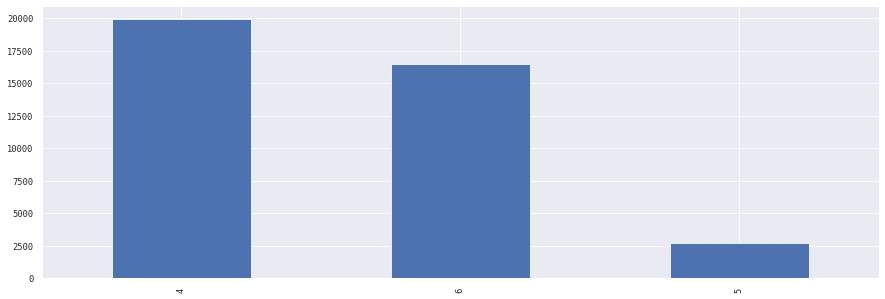

In [ ]:

df_rf = df_rf[df_rf.Serve > 3]

pd.value_counts(df_rf['Serve']).plot.bar()

In [ ]:

cormat = df_rf.corr()

f, ax = plt.subplots(figsize=(12, 9))

colormap = plt.cm.viridis
sns.heatmap(cormat, linewidths=0.1, cmap = colormap, 
            linecolor = 'White', vmax=0.8, annot=True)

In [ ]:
df_rr = df[df['match_id'].str.contains("Roger_Federer-Rafael_Nadal")]

In [ ]:
print(df_rr.size)

178320


In [ ]:
df_rr_m = list(df_rr.groupby('match_id'))

In [ ]:
print(len(df_rr_m), df_rr_m[0])

In [ ]:
for k, v in df_rr_m:
  print(len(v))

In [ ]:
first_serve = df_rr_m[0][1]['1st']
second_serve = df_rr_m[0][1]['2nd']
rally_count = df_rr_m[0][1]['rallyCount']
Pts = df_rr_m[0][1]['Pts']
PtWinner = df_rr_m[0][1]['PtWinner']
Serving = df_rr_m[0][1]['Serving']
Set1 = df_rr_m[0][1]['Set1']
Set2 = df_rr_m[0][1]['Set2']
Gm1 = df_rr_m[0][1]['Gm1']
Gm2 = df_rr_m[0][1]['Gm2']
opp = df_rr_m[0][0].split("-")[5]

deuceScores = ['0-0', '15-15', '30-0', '0-30', '40-15', '15-40', '40-40']
isDueceCourt = []
for ptr in Pts:
  if ptr in deuceScores:
    isDueceCourt.append(1)
  else:
    isDueceCourt.append(0)
df_rr_m[0][1]['Is_Duece_Court'] = isDueceCourt

print(first_serve.iloc[0], second_serve.iloc[0], rally_count.iloc[0], isDueceCourt[0], PtWinner.iloc[0], \
      Serving.iloc[0], Pts.iloc[0], Set1.iloc[0], Set2.iloc[0], Gm1.iloc[0], Gm2.iloc[0], opp)
print(first_serve.iloc[1], second_serve.iloc[1], rally_count.iloc[1], isDueceCourt[1])

6d 6f27f2b2f1n@ 4 1 2 RF 0-0 0 0 0.0 0.0 Rafael_Nadal
4w 5f39b2f1f1b1n@ 5 0
